In [19]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
#load the dataset and naming columns
data=pd.read_csv("car_evaluation.csv",header=None)
data.columns=["buying price","maintanance cost","doors","persons","lug_boot","safety","decision"]
data


,buying price,maintanance cost,doors,persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
data.dtypes #checking datatypes 


buying price        object
maintanance cost    object
doors               object
persons             object
lug_boot            object
safety              object
decision            object
dtype: object

In [5]:
data.isna().sum()#checking null values


buying price        0
maintanance cost    0
doors               0
persons             0
lug_boot            0
safety              0
decision            0
dtype: int64

In [6]:
data["persons"].unique()


array(['2', '4', 'more'], dtype=object)

In [7]:
#encoding the catagorical data
la_b=LabelEncoder()
data["buying price"]=la_b.fit_transform(data["buying price"])
la_M=LabelEncoder()
data["maintanance cost"]=la_M.fit_transform(data["maintanance cost"])
la_L=LabelEncoder()
data["lug_boot"]=la_L.fit_transform(data["lug_boot"])
la_S=LabelEncoder()
data["safety"]=la_S.fit_transform(data["safety"])



In [8]:
#craeting dictionary to map the columns doors and persons
#doors and persons columns contain catogarical values thats changing to numerical values
doors={'2':2, '3':3, '4':4, '5more':5}
persons={'2':2, '4':4, 'more':5}
data["doors"]=data["doors"].map(doors)
data["persons"]=data["persons"].map(persons)

In [10]:
data

,buying price,maintanance cost,doors,persons,lug_boot,safety,decision
0,3,3,2,2,2,1,unacc
1,3,3,2,2,2,2,unacc
2,3,3,2,2,2,0,unacc
3,3,3,2,2,1,1,unacc
4,3,3,2,2,1,2,unacc
...,...,...,...,...,...,...,...
1723,1,1,5,5,1,2,good
1724,1,1,5,5,1,0,vgood
1725,1,1,5,5,0,1,unacc
1726,1,1,5,5,0,2,good


In [11]:
#setting target and input 
x=data.drop("decision",axis=1)#removing target column in input data
y=data["decision"]#target

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)
#spliting dataset for testing and valudation

In [13]:
#creating model
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
model.score(x_test,y_test)


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9282407407407407

In [14]:
#prediction using the model and testing data
y_pred=model.predict(x_test)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [15]:
#getting confusion matrix for valuadation perfomans of model
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 88,   2,   6,   0],
       [  9,   9,   0,   0],
       [  4,   1, 297,   0],
       [  8,   1,   0,   7]], dtype=int64)

In [17]:
#for getting accuracy score 
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9282407407407407

<Figure size 2000x700 with 0 Axes>

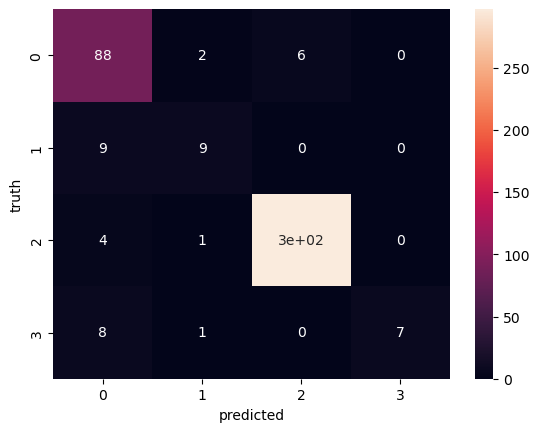

<Figure size 2000x700 with 0 Axes>

In [20]:
#heatmap for displaying confusion matrix
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.figure(figsize=(20,7))